In [1]:
#importing necessary libraries

#for numerical operations
import pandas as pd
import numpy as np

#for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sms_df = pd.read_csv('spam.csv' , encoding = "ISO-8859-1" )

In [3]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
sms_df.shape

(5572, 5)

In [5]:
sms_df.size

27860

In [6]:
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
#random 5 records
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5346,ham,"My Parents, My Kidz, My Friends n My Colleague...",NaN,NaN,NaN
2967,ham,"Mostly sports type..lyk footbl,crckt..",NaN,NaN,NaN
3114,ham,I wait 4 Ì_ inside da car park...,NaN,NaN,NaN
3850,ham,We have all rounder:)so not required:),NaN,NaN,NaN
2325,ham,Apps class varaya elaya.,NaN,NaN,NaN


In [9]:
'''
Note -
all of the columns are of object type,
thus we need to convert them into numeric type
because model only takes numeric valus for prediction
'''

sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [10]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
sms_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
#Dropping Columns
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1, inplace =True)

In [13]:
print(sms_df.columns)

Index(['v1', 'v2'], dtype='object')


In [14]:
#Checking after dropping columns
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#renaming the column names
sms_df.rename(columns={'v1':'target' , 'v2' : 'sms'}, inplace = True )

In [16]:
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#Check for duplicated values
sms_df[sms_df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
sms_df.duplicated().sum()

np.int64(403)

In [19]:
#Before removing duplicate records
sms_df.shape

(5572, 2)

In [20]:
sms_df.drop_duplicates(inplace = True)

In [21]:
# after removing duplicate records
sms_df.shape

(5169, 2)

In [22]:
#Exploratory data analysis
sms_df.columns

Index(['target', 'sms'], dtype='object')

In [23]:
sms_df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [24]:
#in percentage
sms_df['target'].value_counts(normalize=True)*100

target
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64

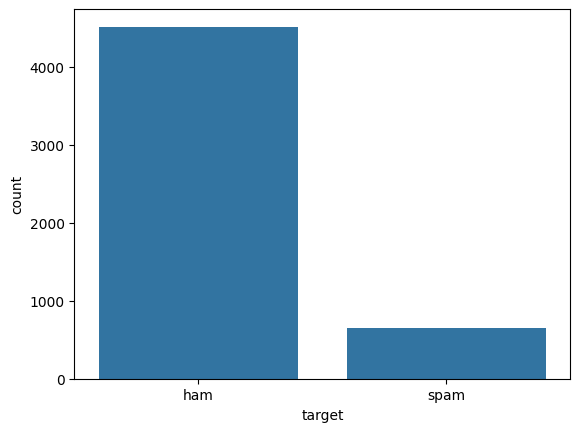

In [25]:
# data is unbalanced
sns.countplot(x=sms_df['target'])
plt.show()

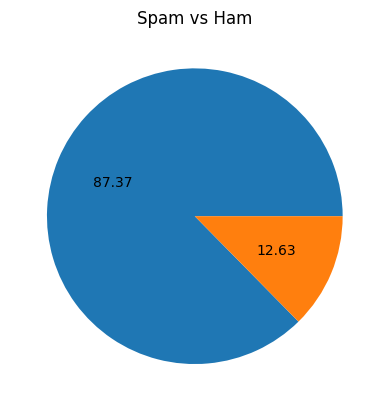

In [26]:
#Calculating individual % of each category of "Species" column
plt.pie(x=sms_df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

In [27]:
from wordcloud import WordCloud

In [28]:
plt.figure(figsize=(30,30)) 
wc=WordCloud(width=2000,height=1000,background_color='black')

<Figure size 3000x3000 with 0 Axes>

In [29]:
#for spam sms
spam_wc =wc.generate(sms_df[sms_df['target']=='spam']['sms'].str.cat(sep=""))
spam_wc

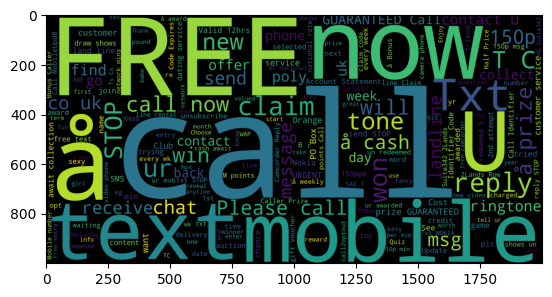

In [30]:
plt.imshow(spam_wc)
plt.show()

In [31]:
#for ham sms
ham_wc = wc.generate(sms_df[sms_df['target']=='ham']['sms'].str.cat(sep=""))
ham_wc

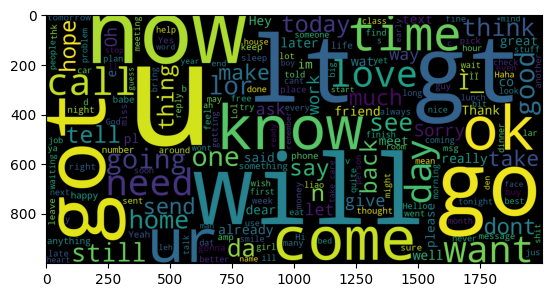

In [32]:
plt.imshow(ham_wc)
plt.show()

In [33]:
#Converting text data into numeric form
#Converting spam as 1 and ham as 0
sms_df['target']=sms_df['target'].map({'spam':1 , 'ham':0})

In [34]:
#After changes
sms_df['target'].unique()

array([0, 1])

In [35]:
sms_df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [39]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [40]:
def transform_sms(message):
    # Convert all characters to lowercase
    message = message.lower()

    # Break SMS record into words
    message = nltk.word_tokenize(message)

    # Remove special symbols (keeping only alphanumeric characters)
    temp = []
    for i in message:
        if i.isalnum():
            temp.append(i)

    #Creating clone of temp
    message=temp[:]

    #clear the temp object
    temp.clear()

    # Removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    message=temp[:]
    temp.clear()

    # Stemming
    for i in message:
        temp.append(ps.stem(i))

    # Return the transformed message as a single string
    return " ".join(temp)


In [41]:
#Calling function transform_sms by passing sms records
# Apply the transformation to the 'sms' column
sms_df['sms_transformed'] = sms_df['sms'].apply(transform_sms)


In [42]:
sms_df.head()

,target,sms,sms_transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [43]:
#Now spam is equal to 1
spam_wc = wc.generate(sms_df[sms_df['target'] == 1]['sms_transformed'].str.cat(sep=" "))
spam_wc

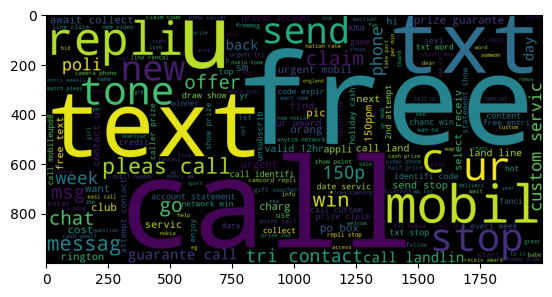

In [44]:
#Top 10 most used words in spam sms
plt.imshow(spam_wc)
plt.show()

In [45]:
#For storing most used words
most_used_spam_words = []

#.tolist() -> to convert 'series' object into 'list'
spam_list = sms_df[sms_df['target']==1]['sms_transformed'].tolist()

#accesssing each individual elements from spam_list
for sentence in  spam_list:

    #accessing each individual word from list elements
    for word in sentence.split():
        most_used_spam_words.append(word)

In [46]:
#used for finding most common words
from collections import Counter

In [47]:
top_10 = pd.DataFrame(Counter(most_used_spam_words).most_common(10))

In [48]:
print(top_10)

       0    1
0   call  320
1   free  191
2      2  155
3    txt  141
4   text  122
5      u  119
6     ur  119
7  mobil  114
8   stop  104
9  repli  103


C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\3632305444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10[0], y=top_10[1], palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\3632305444.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_10[0], y=top_10[1], palette=colors)


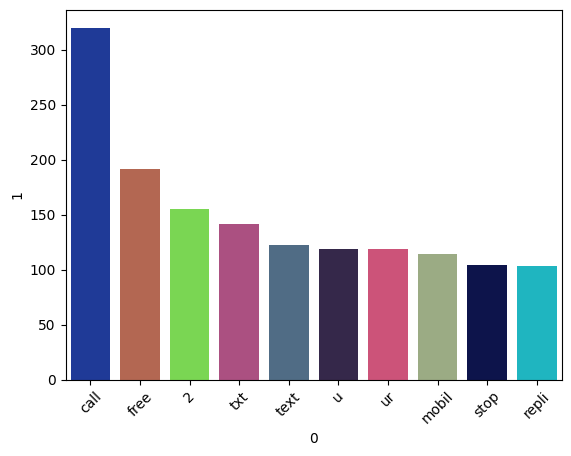

In [49]:
# Generate random colors
colors = np.random.rand(len(top_10), 3)  # Random RGB colors

# Create the bar plot with different colors
sns.barplot(x=top_10[0], y=top_10[1], palette=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [50]:
sms_df.head()

,target,sms,sms_transformed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [51]:
#On ham records
ham_wc = wc.generate(sms_df[sms_df['target'] == 0]['sms_transformed'].str.cat(sep=" "))
ham_wc

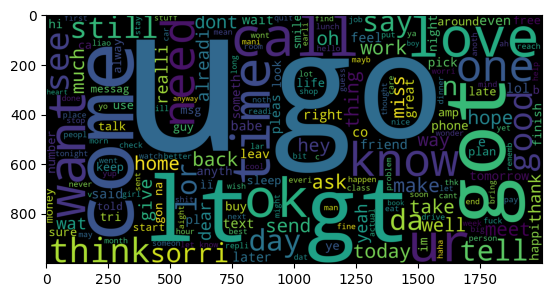

In [52]:
plt.imshow(ham_wc)
plt.show()

In [53]:
#For storing most used words
most_used_ham_words = []

#.tolist() -> to convert 'series' object into 'list'
ham_list = sms_df[sms_df['target']==0]['sms_transformed'].tolist()

#accesssing each individual elements from spam_list
for sentence in  ham_list:

    #accessing each individual word from list elements
    for word in sentence.split():
        most_used_ham_words.append(word)

In [54]:
top_10_ham = pd.DataFrame(Counter(most_used_ham_words).most_common(10))

In [55]:
print(top_10_ham)

      0    1
0     u  883
1    go  404
2   get  349
3    gt  288
4    lt  287
5     2  284
6  come  275
7   got  236
8  know  236
9  like  234


C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\368693661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4204\368693661.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)


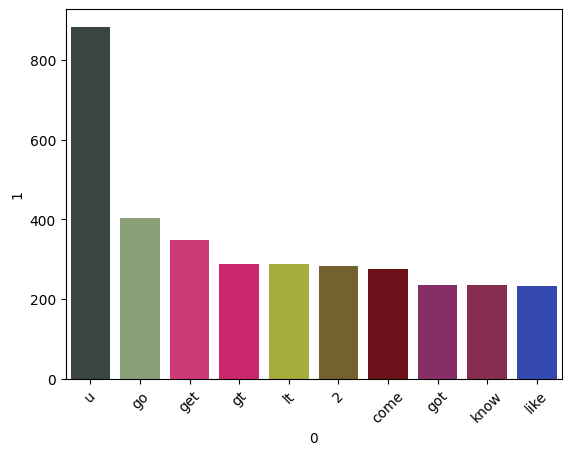

In [56]:
# Generate random colors
colors = np.random.rand(len(top_10), 3)  # Random RGB colors

# Create the bar plot with different colors
sns.barplot(x=top_10_ham[0], y=top_10_ham[1], palette=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [57]:
#Converting 'sms' text data into numeric
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
# Convert text data into TF-IDF vectors
x = tfidf.fit_transform(sms_df['sms_transformed']).toarray()

print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
y  = sms_df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
y.shape

(5169,)

In [60]:
#Train test split
from sklearn.model_selection import train_test_split


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (4135, 6708)
x_test: (1034, 6708)
y_train: (4135,)
y_test: (1034,)


In [63]:
#Training and evaluating model

# Logistic regression
from sklearn.linear_model import LogisticRegression


In [64]:
model_lr = LogisticRegression()

In [65]:
#Train the model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [66]:
#Testing
y_pred_lr = model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score,precision_score

print("Accuracy score",accuracy_score(y_test,y_pred_lr))
print("Precision score",precision_score(y_test,y_pred_lr))

Accuracy score 0.9487427466150871
Precision score 0.9423076923076923


In [69]:
# Support Vector Machine(SVM)

from sklearn.svm import SVC

In [70]:

model_svm = SVC()

In [71]:
model_svm.fit(x_train,y_train)

SVC()

In [72]:
y_pred_svm = model_svm.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0])

In [73]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [74]:
print("Accuracy score",accuracy_score(y_test,y_pred_svm))
print("Precision score",precision_score(y_test,y_pred_svm))

Accuracy score 0.9680851063829787
Precision score 0.9912280701754386


In [75]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [76]:
#Define depth of the decision tree in random forest
model_rf = RandomForestClassifier(max_depth=10,random_state=0)

In [77]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [78]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
print("Accuracy score",accuracy_score(y_test,y_pred_rf))
print("Precision score",precision_score(y_test,y_pred_rf))

Accuracy score 0.8936170212765957
Precision score 1.0


In [81]:
#Bernoulli NB

from sklearn.naive_bayes import BernoulliNB

In [82]:
model_bnb = BernoulliNB()

In [83]:
model_bnb.fit(x_train,y_train)

BernoulliNB()

In [84]:
y_pred_bnb = model_bnb.predict(x_test)
y_pred_bnb

array([0, 1, 0, ..., 1, 0, 0])

In [85]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
print("Accuracy score",accuracy_score(y_test,y_pred_bnb))
print("Precision score",precision_score(y_test,y_pred_bnb))

Accuracy score 0.9661508704061895
Precision score 0.9661016949152542


In [87]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

In [88]:
model_gnb = GaussianNB()

In [89]:
model_gnb.fit(x_train,y_train)

GaussianNB()

In [90]:
y_pred_gnb =model_gnb.predict(x_test)
y_pred_gnb

array([0, 0, 1, ..., 1, 0, 0])

In [91]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [92]:
print("Accuracy score",accuracy_score(y_test,y_pred_gnb))
print("Precision score",precision_score(y_test,y_pred_gnb))

Accuracy score 0.8636363636363636
Precision score 0.5084033613445378


In [93]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB

In [94]:
model_mnb = MultinomialNB()

In [95]:
model_mnb.fit(x_train,y_train)


MultinomialNB()

In [96]:
y_pred_mnb = model_mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, ..., 1, 0, 0])

In [97]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [98]:
print("Accuracy score",accuracy_score(y_test,y_pred_mnb))
print("Precision score",precision_score(y_test,y_pred_mnb))

Accuracy score 0.9613152804642167
Precision score 0.9906542056074766


In [99]:
# Preparing model for deployment
import pickle

In [100]:
pickle.dump(model_mnb,open('model.sav', 'wb'))

In [101]:
#Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form)
pickle.dump(tfidf,open('tfidf_vectorizer.sav' , 'wb'))

In [102]:
#Checking whether our model is working fine or not
load_model_mnb = pickle.load(open('model.sav','rb'))
load_tfidf = pickle.load(open('tfidf_vectorizer.sav','rb'))

In [103]:
input_sms = "Congratulations! You've won a $1000 gift card. Click here to claim your prize now."

In [104]:
input_sms = transform_sms(input_sms)

In [105]:
input_sms

'congratul 1000 gift card click claim prize'

In [106]:
input_sms = load_tfidf.transform([input_sms])

In [107]:
pred = load_model_mnb.predict(input_sms)[0]

In [108]:
pred

np.int64(1)